In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option("display.float_format", lambda x: "%.2f" % x)

dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [5]:
# age 

df["new_age"] = pd.cut(df["age"], [0,18,25,40,90])

df.head()

,age,sex,bmi,children,smoker,region,charges,new_age
0,19,female,27.90,0,yes,southwest,16884.92,"(18, 25]"
1,18,male,33.77,1,no,southeast,1725.55,"(0, 18]"
2,28,male,33.00,3,no,southeast,4449.46,"(25, 40]"
3,33,male,22.70,0,no,northwest,21984.47,"(25, 40]"
4,32,male,28.88,0,no,northwest,3866.86,"(25, 40]"


In [6]:
# categorical veriables

cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]

cat_cols

['sex', 'smoker', 'region', 'new_age']

male      676
female    662
Name: sex, dtype: int64


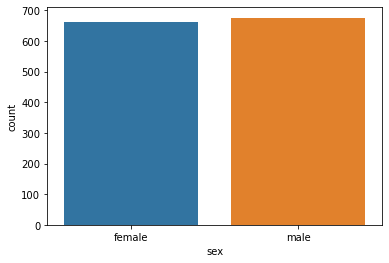

********************************************************
no     1064
yes     274
Name: smoker, dtype: int64


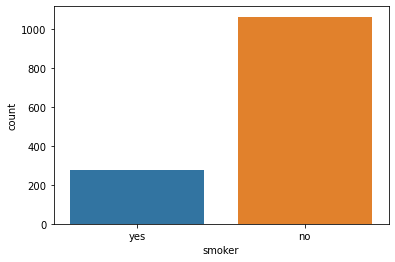

********************************************************
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


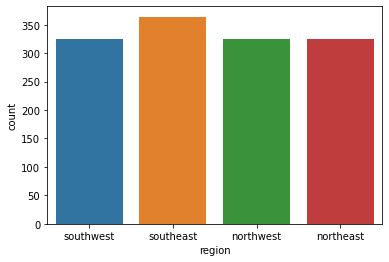

********************************************************
(40, 90]    637
(25, 40]    395
(18, 25]    237
(0, 18]      69
Name: new_age, dtype: int64


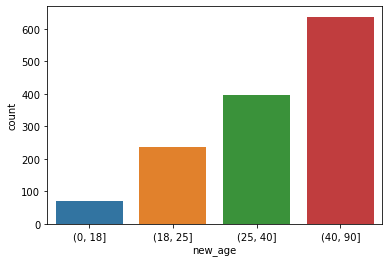

********************************************************


In [7]:
# analysis of categorical veriables

for i in cat_cols:
    print(df[i].value_counts())
    
    sns.countplot(x=df[i], data=df)
    plt.show(block=True)
    
    print("********************************************************")

In [8]:
# numerical veriables

num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]

num_cols

['age', 'bmi', 'children', 'charges']

count   1338.00
mean      39.21
std       14.05
min       18.00
25%       27.00
50%       39.00
75%       51.00
max       64.00
Name: age, dtype: float64


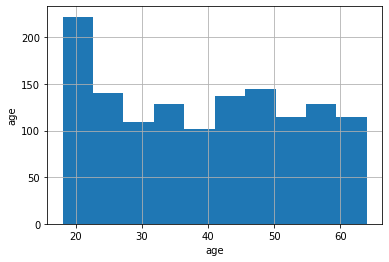

******************************************************************
count   1338.00
mean      30.66
std        6.10
min       15.96
25%       26.30
50%       30.40
75%       34.69
max       53.13
Name: bmi, dtype: float64


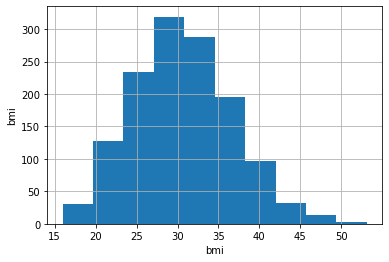

******************************************************************
count   1338.00
mean       1.09
std        1.21
min        0.00
25%        0.00
50%        1.00
75%        2.00
max        5.00
Name: children, dtype: float64


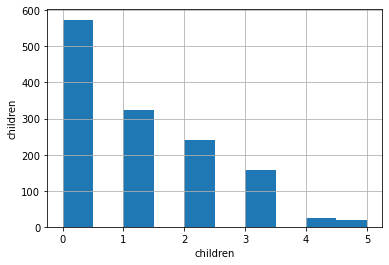

******************************************************************
count    1338.00
mean    13270.42
std     12110.01
min      1121.87
25%      4740.29
50%      9382.03
75%     16639.91
max     63770.43
Name: charges, dtype: float64


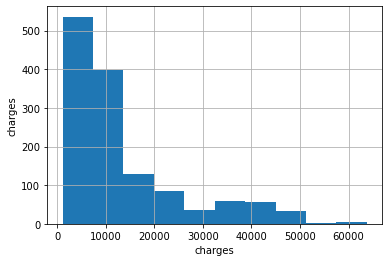

******************************************************************


In [9]:
for i in num_cols:
    print(df[i].describe().T)
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel(i)
    plt.show(block=True)
    print("******************************************************************")

sex
female   12569.58
male     13956.75
Name: charges, dtype: float64


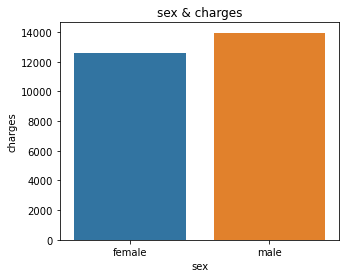

*********************************************
smoker
no     8434.27
yes   32050.23
Name: charges, dtype: float64


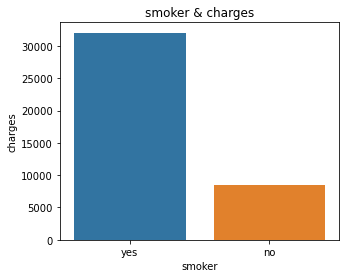

*********************************************
region
northeast   13406.38
northwest   12417.58
southeast   14735.41
southwest   12346.94
Name: charges, dtype: float64


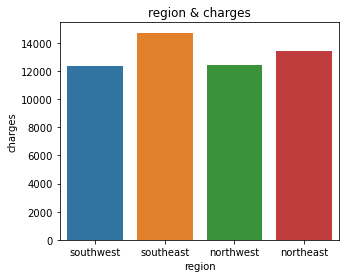

*********************************************
new_age
(0, 18]     7086.22
(18, 25]    9669.53
(25, 40]   11096.68
(40, 90]   16627.96
Name: charges, dtype: float64


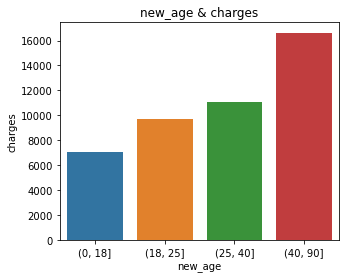

*********************************************


In [10]:
# anaylsis of cat_cols with target column

for i in cat_cols:
    plt.figure(figsize=(5, 4))
    print(df.groupby(i)["charges"].mean())
    sns.barplot(x=i, y='charges', data=df, ci=None)
    plt.title(i + " & charges")
    plt.xlabel(i)
    plt.ylabel("charges")
    plt.show(block=True)
    print("*********************************************")

### Some Examples to Discover the Dataset

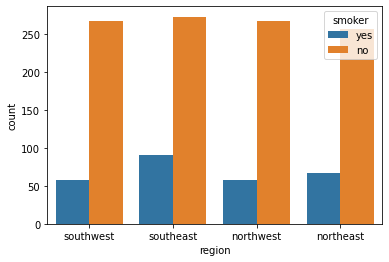

In [12]:
# Examine the relationship between “smoker” and “region”.

sns.countplot(data=df, x="region", hue="smoker");

# We see that there is no smoking in general.
# southeast > northeast > norhwest = southeast we can talk about a cigarette use.

In [13]:
pd.crosstab(df.region, df.smoker) # norhwest = soutwest In order to observe this equality exactly, we convert the image into numbers.

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


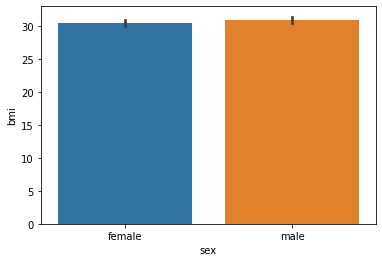

In [14]:
# Examine the relationship between “bmi” and “sex”.

sns.barplot(x='sex', y='bmi', data=df);

# The bmi value of men is higher than that of women.

In [15]:
# Find the "region" with the most "children".

children = df["children"]
region = df["region"]

pd_crosstab = pd.crosstab(df.children, df.region) # We observed two different variables in a single table.

pd_crosstab = pd_crosstab.drop([0], axis=0) # We don't interest in the data that has 0 child. We dropped it.

pd_crosstab = pd.DataFrame(pd_crosstab.sum())

pd_crosstab.idxmax() # The region with the highest child value is "southeast".

0    southeast
dtype: object

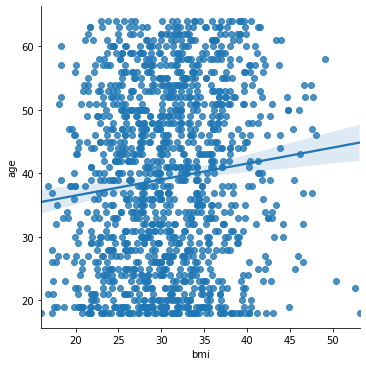

In [16]:
# Examine the relationship between “age” and “bmi”.

sns.lmplot(x="bmi", y="age", data=df); # We observe an increase in bmi value with increasing age.

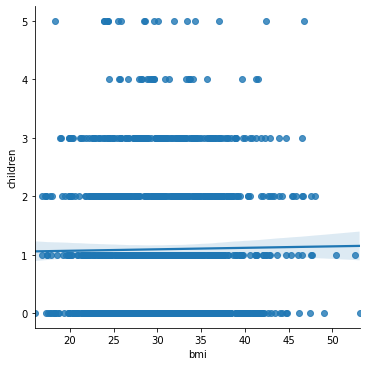

In [17]:
#Examine the relationship between “bmi” and “children”.

sns.lmplot(x="bmi", y="children", data=df);

 #People with bmi values between 25 and 35 have more children.

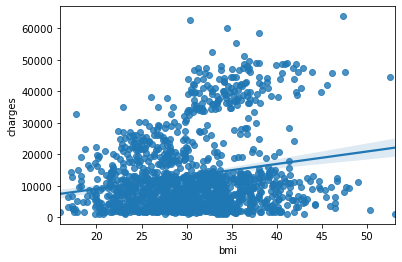

In [18]:
# Examine the relationship between “bmi” and “charges”.

sns.regplot(x='bmi', y='charges', data=df); #As bmi increases, we see that the cost of living also increases.

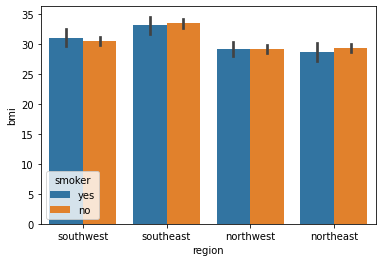

In [19]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

sns.barplot(x='region', y='bmi', hue='smoker', data=df);

## Missing Values, Outlier Anaylysis

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
new_age     0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


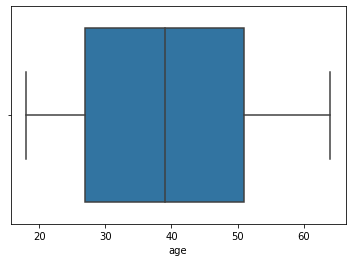

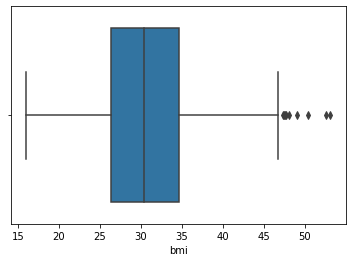

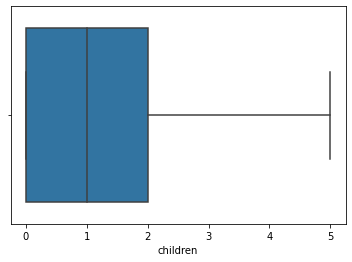

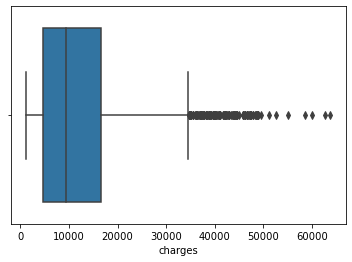

In [22]:
# Outlier anaylsis

for i in num_cols:
    sns.boxplot(x = df[i]);
    plt.show(block=True)

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [24]:
for i in num_cols:
    replace_with_thresholds(df, i)

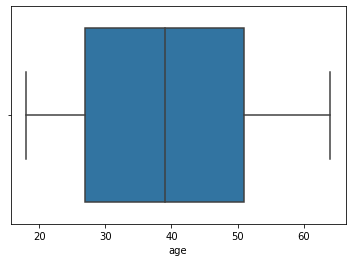

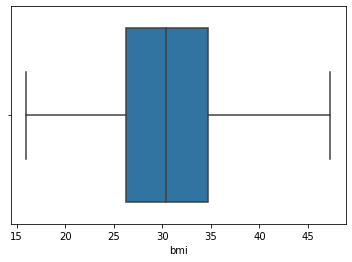

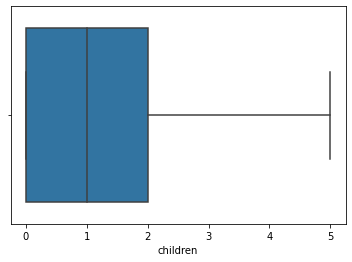

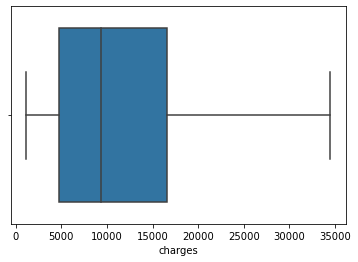

In [25]:
for i in num_cols:
    sns.boxplot(x = df[i]);
    plt.show(block=True)

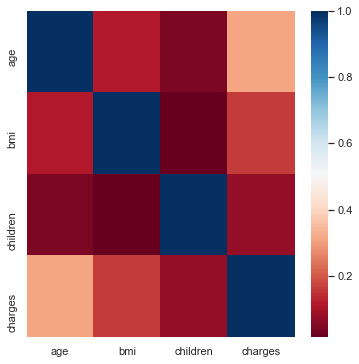

In [26]:
import matplotlib.pyplot as plt

corr = df[num_cols].corr()

sns.set(rc={"figure.figsize": (6, 6)})

sns.heatmap(corr, cmap="RdBu")
plt.show()

In [27]:
corr_matrix = df.corr().abs()

corr_matrix

,age,bmi,children,charges
age,1.00,0.11,0.04,0.31
bmi,0.11,1.00,0.01,0.16
children,0.04,0.01,1.00,0.07
charges,0.31,0.16,0.07,1.00


- The column of children has very low correlation with target column. If we want, we can get rid of the column of children to decrease model complexity for ML models. If we have columns that has very high correlation we would get rid of these columns because the both columns explain same importance.

## OneHotEncoder, RobustScaler, Train-Test-Split

In [28]:
# one hot encoder

df = pd.get_dummies(df, drop_first=True, prefix="", prefix_sep="")

df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest,"(18, 25]","(25, 40]","(40, 90]"
0,19.00,27.90,0.00,16884.92,0,1,0,0,1,1,0,0
1,18.00,33.77,1.00,1725.55,1,0,0,1,0,0,0,0
2,28.00,33.00,3.00,4449.46,1,0,0,1,0,0,1,0
3,33.00,22.70,0.00,21984.47,1,0,1,0,0,0,1,0
4,32.00,28.88,0.00,3866.86,1,0,1,0,0,0,1,0


In [29]:
num_cols

['age', 'bmi', 'children', 'charges']

In [30]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [31]:
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest,"(18, 25]","(25, 40]","(40, 90]"
0,-0.83,-0.30,-0.50,0.63,0,1,0,0,1,1,0,0
1,-0.88,0.40,0.00,-0.64,1,0,0,1,0,0,0,0
2,-0.46,0.31,1.00,-0.41,1,0,0,1,0,0,1,0
3,-0.25,-0.92,-0.50,1.06,1,0,1,0,0,0,1,0
4,-0.29,-0.18,-0.50,-0.46,1,0,1,0,0,0,1,0


In [32]:
# Train - Test Split

from sklearn.model_selection import train_test_split

y = df['charges'] # target
X = df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=144)

## ML Models

In [33]:
# 1. Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [34]:
y_pred = lm.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) # RMSE

0.3969434917557063

In [35]:
lm.score(X_test, y_test)

0.7552326020327379

In [36]:
lm.score(X_train, y_train) # we can see that the model has not overfitting because the test score is higher than train score.

0.749695392409534

In [37]:
lm.intercept_

0.09856488465359642

In [38]:
lm.coef_

array([ 0.56868417,  0.16788124,  0.08680783,  0.00242758,  1.64832004,
       -0.01564766, -0.10375039, -0.08815275,  0.03107088, -0.18034587,
       -0.18594464])

In [39]:
# 2. Ridge Regression

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [40]:
y_pred = ridge_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.3970061063289225


In [41]:
# Model Tuning

lambdalar = 10**np.linspace(10,-2,100)*0.5

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = lambdalar,
                  scoring = "neg_mean_squared_error",
                  normalize = True)

ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [42]:
ridge_cv.alpha_ # Optimal alpha value.

0.005

In [43]:
# Final Model

ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   normalize = True).fit(X_train, y_train)

In [44]:
# Final Predictions and RMSE

np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))) # Optimal RMSE value.

0.3976278783324791

In [45]:
# 3. Lasso Regression

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

In [46]:
y_pred = lasso_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5132080383402263


In [47]:
# Model Tuning

from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=None, 
                         cv=10, 
                         max_iter=10000, 
                         normalize=True)

lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [48]:
lasso_cv_model.alpha_ # Optimal alpha value.

2.0722791953436324e-05

In [49]:
# Final Model

lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

lasso_tuned.fit(X_train, y_train)

y_pred = lasso_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) # Optimal RMSE value.

0.39695216720983306

In [50]:
# 4. ElasticNet Regression

from sklearn.linear_model import ElasticNet

enet_model = ElasticNet().fit(X_train, y_train)

y_pred = enet_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.8088725038479171

In [51]:
# Model Tuning

from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train)

In [52]:
enet_cv_model.alpha_ # Optimal alpha value

0.0005595347495028896

In [53]:
# Final Model 

enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train, y_train)

y_pred = enet_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) #Optimal RMSE Value

0.39729335319154485

### Results

- The model with the lowest RMSE value is the best performing model.


- 1. Multiple Linear Regression | RMSE: 0.3969434917557063
- 2. Ridge Regression | RMSE: 0.3970061063289225
- 3. Lasso Regression | RMSE: 0.39695216720983306
- 4. ElasticNet Regression | RMSE: 0.39729335319154485


- **Multiple Linear Regression** model has the best performance for this data set.